#1.	Predict the department-wide sales for each store for the following year

#2.	Model the effects of markdowns on holiday weeks

#3.	Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact

# Retail Sales Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_store = pd.read_csv(r"D:\GUVI\Data Science - GUVI\DTM2\Final Project\stores_data_set.csv")
df_store

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [3]:
df_sales = pd.read_csv(r"D:\GUVI\Data Science - GUVI\DTM2\Final Project\sales_data_set.csv", parse_dates=['Date'])
df_sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-05-10,628.10,False
421567,45,98,2012-12-10,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [4]:
df_features = pd.read_csv(r"D:\GUVI\Data Science - GUVI\DTM2\Final Project\Features_data_set.csv", parse_dates=['Date'])
df_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-05-07,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-12-07,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [5]:
df_store.shape

(45, 3)

In [6]:
df_sales.shape

(421570, 5)

In [7]:
df_features.shape

(8190, 12)

In [8]:
missing_values_count = df_store.isnull().sum()
print(missing_values_count)

Store    0
Type     0
Size     0
dtype: int64


In [9]:
missing_values_count = df_sales.isnull().sum()
print(missing_values_count)

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


In [10]:
missing_values_count = df_features.isnull().sum()
print(missing_values_count)

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


In [11]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


# Dealing with data in wrong format

In [12]:
df_features['MarkDown1'] = pd.to_numeric(df_features['MarkDown1'], errors='coerce')
df_features['MarkDown2'] = pd.to_numeric(df_features['MarkDown2'], errors='coerce')
df_features['MarkDown3'] = pd.to_numeric(df_features['MarkDown3'], errors='coerce')
df_features['MarkDown4'] = pd.to_numeric(df_features['MarkDown4'], errors='coerce')
df_features['MarkDown5'] = pd.to_numeric(df_features['MarkDown5'], errors='coerce')
df_features['CPI'] = pd.to_numeric(df_features['CPI'], errors='coerce')
df_features['Unemployment'] = pd.to_numeric(df_features['Unemployment'], errors='coerce')

# Nan values and shape after dealing with data in wrong format

In [13]:
missing_values_count = df_sales.isnull().sum()
print(missing_values_count)
print(df_sales.shape)
df_sales.info()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
(421570, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


# Dealing with Missing Values

In [14]:
df_sales = df_sales.dropna()

In [15]:
missing_values_count = df_sales.isnull().sum()
print(missing_values_count)
print(df_sales.shape)

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
(421570, 5)


In [16]:
df_sales_p=df_sales.copy()

# Plotting the values in graph

In [17]:
df_store_p=df_store.copy()

In [18]:
df_store.shape
missing_values_count = df_store.isnull().sum()
print(missing_values_count)

Store    0
Type     0
Size     0
dtype: int64


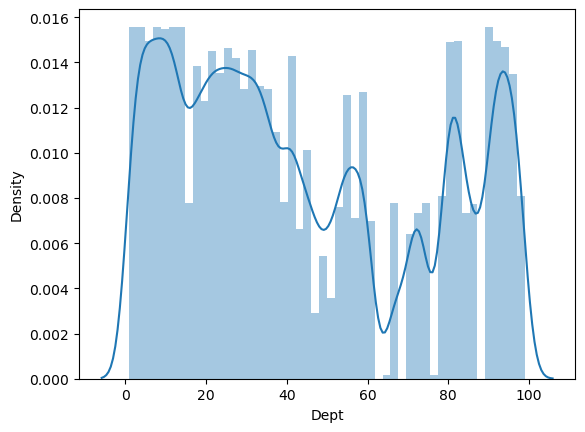

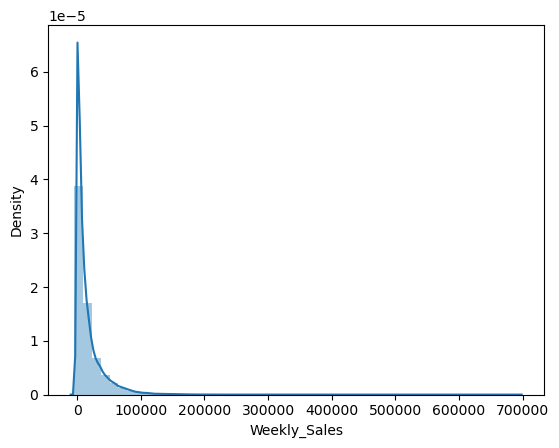

In [19]:
df_sales_p['Dept']
df_sales_p['Date']
df_sales_p['Weekly_Sales']

sns.distplot(df_sales_p['Dept'])
plt.show()
sns.distplot(df_sales_p['Weekly_Sales'])
plt.show()

In [20]:
df_sales_p.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

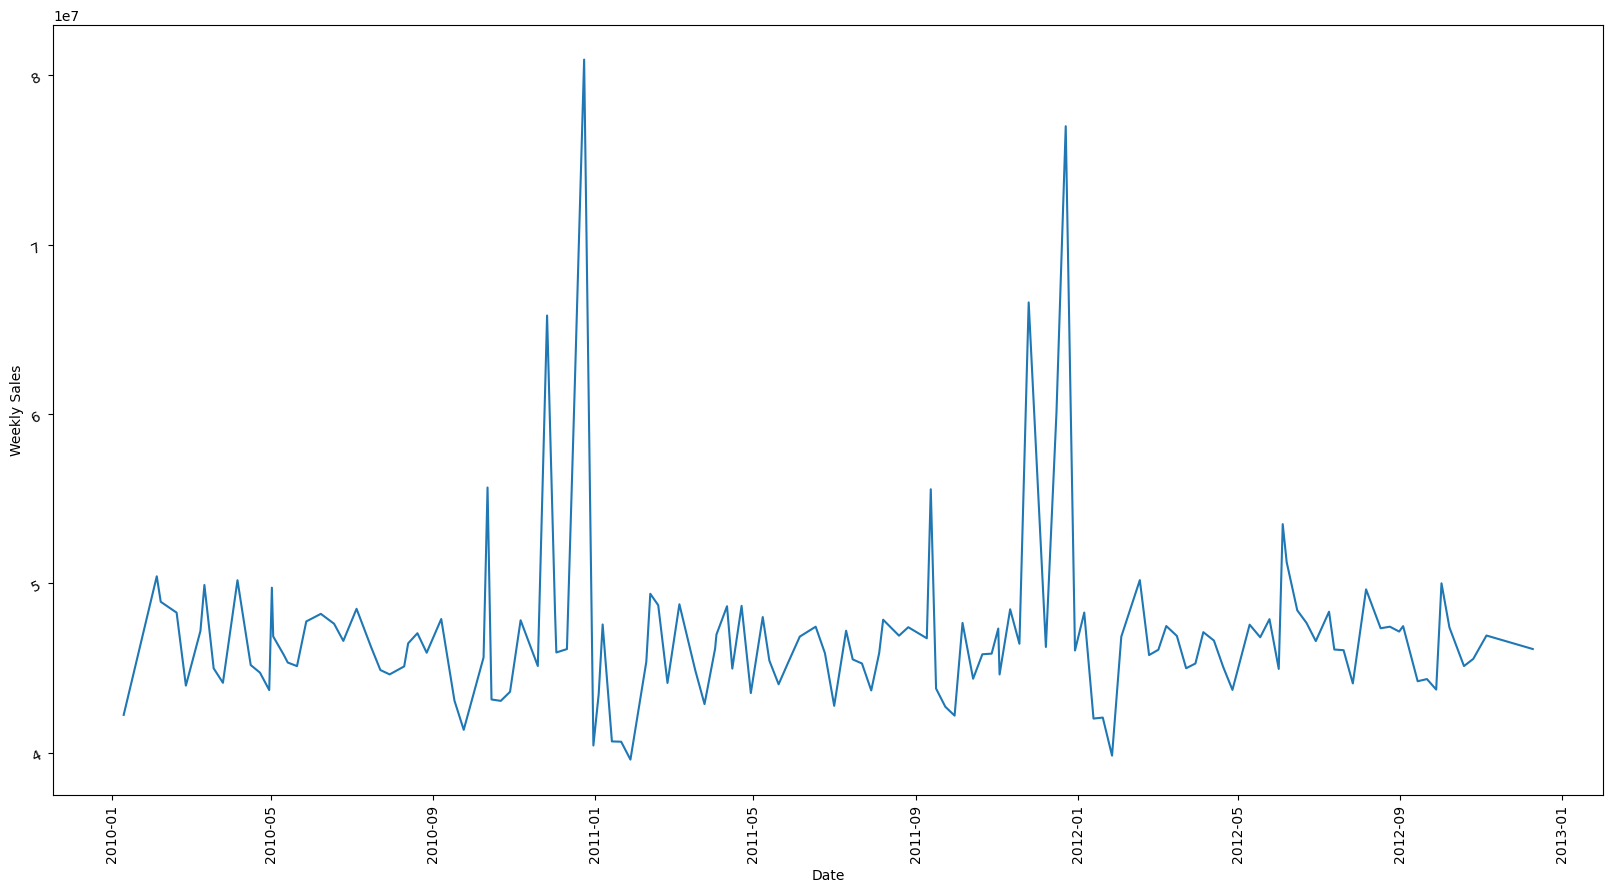

In [21]:
df_sales_week= df_sales.groupby(by=['Date'], as_index= False)['Weekly_Sales'].sum()

df_sales_avg_sales=df_sales_week.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(20,10))
plt.xlabel("Date")
plt.xticks(rotation = 90)
plt.ylabel("Weekly Sales")
plt.yticks(rotation = 25)
plt.plot(df_sales_week.Date, df_sales_week.Weekly_Sales)
plt.show()

In [22]:
# Grouping feature data in date column
date_time = df_features.groupby('Date').agg({'Temperature': 'mean','Fuel_Price': 'mean',
                                             'IsHoliday':'sum', 'CPI': 'mean', 'Unemployment': 'mean'})
date_time = date_time.sort_index()
temp_date = date_time[:'2012-12-10']

# Grouping sales data in date column
sales_date = df_sales.groupby('Date').agg({'Weekly_Sales': 'sum'})
sales_date.sort_index(inplace=True)
sales_date.Weekly_Sales = sales_date.Weekly_Sales/1000000
sales_date.Weekly_Sales = sales_date.Weekly_Sales.apply(int)
both_data = pd.merge(sales_date, temp_date, left_index=True, right_index=True, how='left')
both_data['IsHoliday'] = both_data['IsHoliday'].apply(lambda x: True if x == 45.0 else False)

In [23]:
print(both_data.describe())

       Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment
count    143.000000   143.000000  143.000000  143.000000    143.000000
mean      46.601399    60.663782    3.358607  171.578394      7.999151
std        5.399713    15.172792    0.429401    3.100148      0.483853
min       39.000000    30.480889    2.672067  167.546485      6.953711
25%       44.000000    47.720222    2.885367  168.408144      7.508333
50%       46.000000    61.051111    3.488644  171.386189      8.150133
75%       47.000000    74.697333    3.726133  174.724576      8.428578
max       80.000000    82.176444    3.997778  176.652613      8.619311


In [24]:
plt.style.use('ggplot')

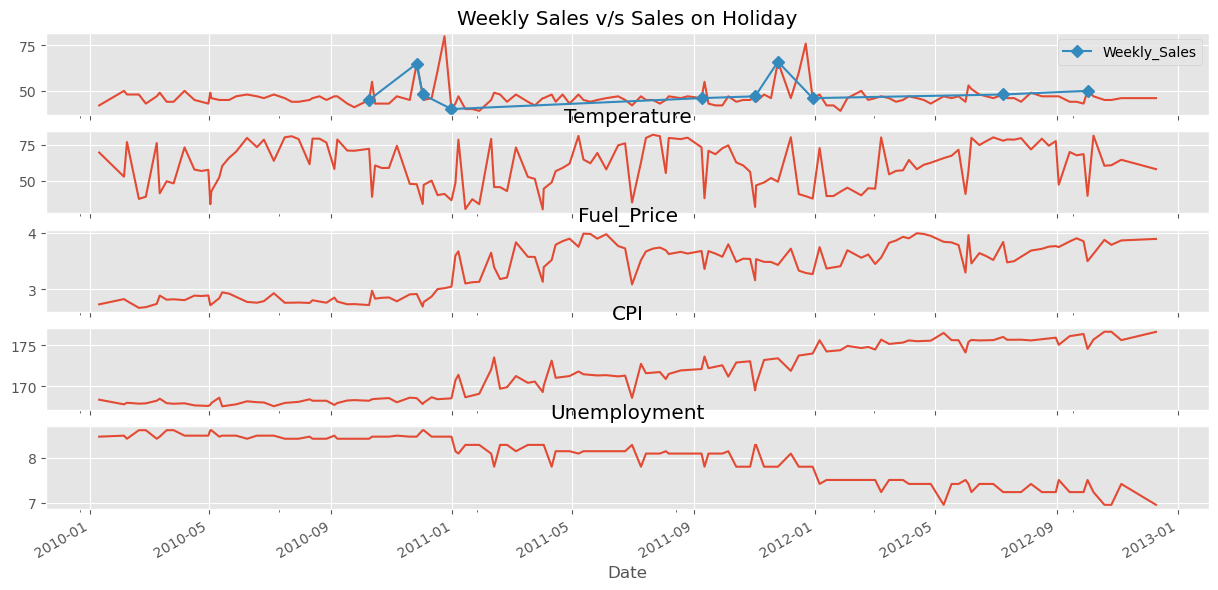

In [25]:
fig, ax = plt.subplots(5,1, figsize=(15,7), sharex=True)
both_data['Weekly_Sales'].plot(ax=ax[0], title= 'Weekly Sales v/s Sales on Holiday')
both_data[both_data.IsHoliday==True]['Weekly_Sales'].plot(marker = 'D',ax=ax[0],legend= 'Holiday Week Sale')
both_data['Temperature'].plot(ax=ax[1], title='Temperature')
both_data['Fuel_Price'].plot(ax=ax[2], title='Fuel_Price')
both_data['CPI'].plot(ax=ax[3], title='CPI')
both_data['Unemployment'].plot(ax=ax[4], title='Unemployment')
plt.show()

<Axes: >

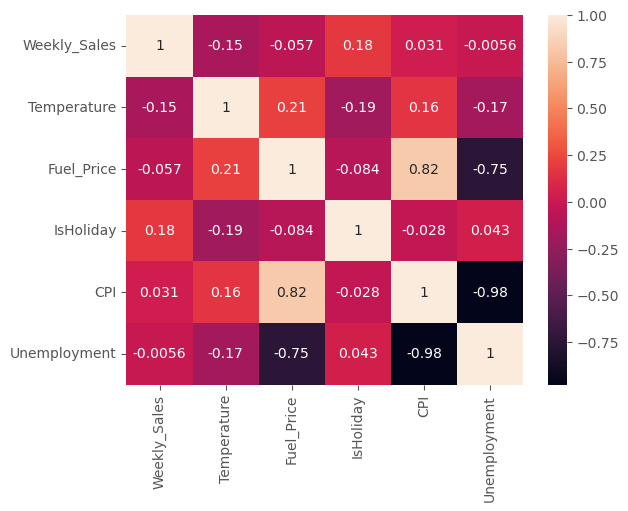

In [26]:
sns.heatmap(both_data.corr(), annot=True)

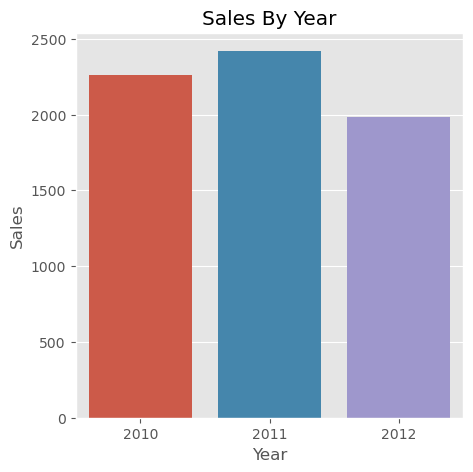

In [27]:
dt_sales_year = both_data.groupby(both_data.index.year).agg({'Weekly_Sales': 'sum'})
plt.figure(figsize=(5,5))
sns.barplot(x = dt_sales_year.index, y = dt_sales_year.Weekly_Sales)
plt.title('Sales By Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

# Predicting the department-wide sales for each store for the following year

In [28]:
df_sales.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [29]:
ddf_sales = df_sales.groupby(['Store', 'Date']).agg({'Weekly_Sales': 'sum'})
ddf_sales.sort_index(inplace=True)
ddf_sales.Weekly_Sales = ddf_sales.Weekly_Sales/10000
ddf_sales.Weekly_Sales = ddf_sales.Weekly_Sales.apply(int)
df_table = pd.merge(df_features, ddf_sales, how='left', on = ['Store','Date'])
df_table = pd.merge(df_table, df_store[['Store','Type']], how='left', on=['Store'])
df_table.head(20)
df_tables = df_table[df_table.Weekly_Sales.notnull()]
df_tab = df_table[df_table.Weekly_Sales.isnull()]

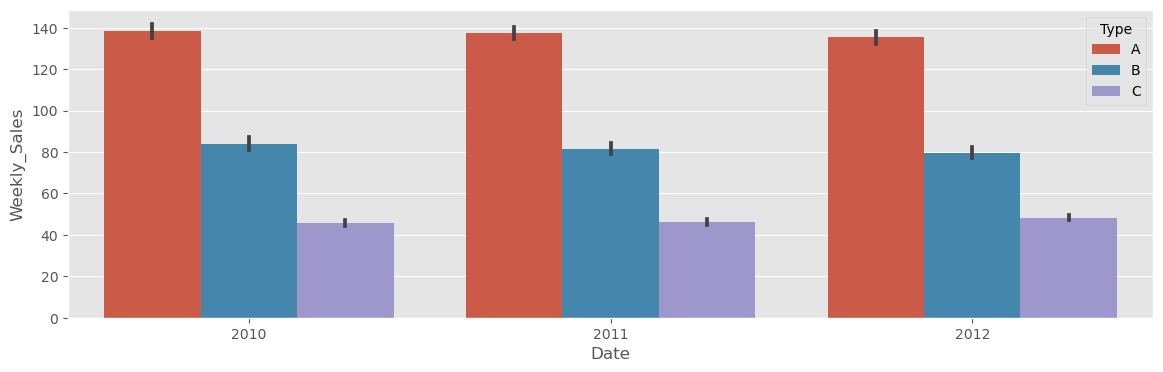

In [30]:
plt.figure(figsize=(14,4))
sns.barplot(x=df_tables.Date.dt.year, y= df_tables.Weekly_Sales, hue=df_tables.Type)
plt.show()

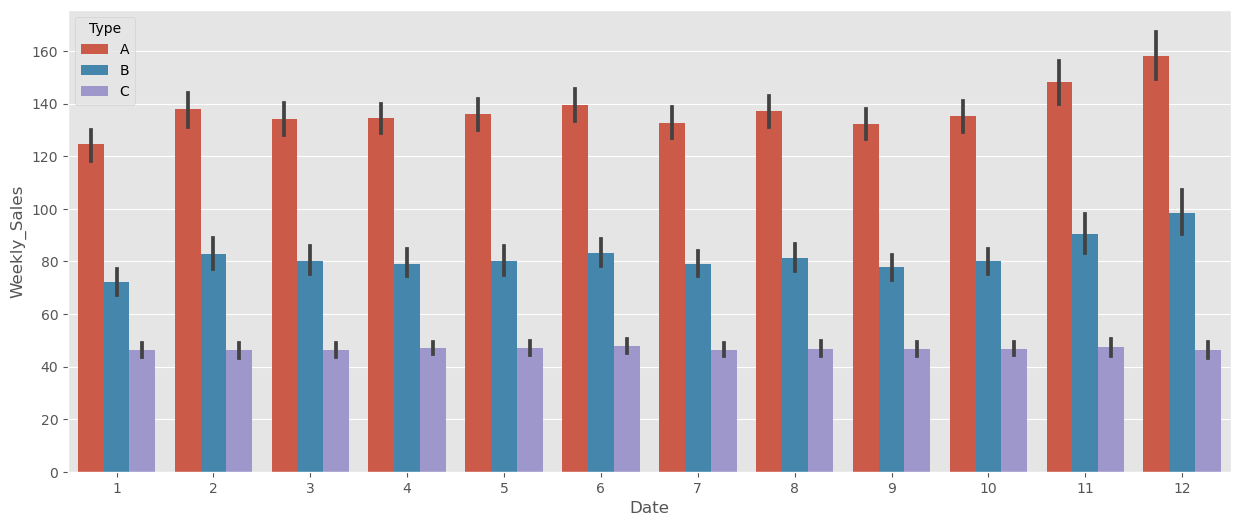

In [31]:
plt.figure(figsize=(15,6))
sns.barplot(x=df_tables.Date.dt.month, y= df_tables.Weekly_Sales, hue=df_tables.Type)
plt.show()

In [32]:
denorm = pd.merge(df_sales, df_features, how = 'left', on=['Store', 'Date', 'IsHoliday'])
denorm = pd.merge(denorm, df_store, how = 'left', on=['Store'])

denorm['IsReturn'] = ((denorm['Weekly_Sales'] < 0))
denorm = denorm.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis = 1)

denorm['Date'] = pd.to_datetime(denorm['Date'], format="%d/%m/%Y")

denormSales = denorm.copy()
denormSales = denormSales.assign(IsHolidayInt = [int(x) for x in list(denormSales.IsHoliday)])

print(denormSales.columns.tolist())

['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size', 'IsReturn', 'IsHolidayInt']


In [33]:
print('Dept count :',len(denorm['Dept'].unique()))

Dept count : 81


In [34]:
sales_by_dept = denorm.groupby(by='Dept', as_index=False)['Weekly_Sales'].sum()
sales_by_dept.head()

,Dept,Weekly_Sales
0,1,1.236388e+08
1,2,2.806112e+08
2,3,7.589245e+07
3,4,1.671467e+08
4,5,1.356074e+08


Text(0.5, 0, 'Department')

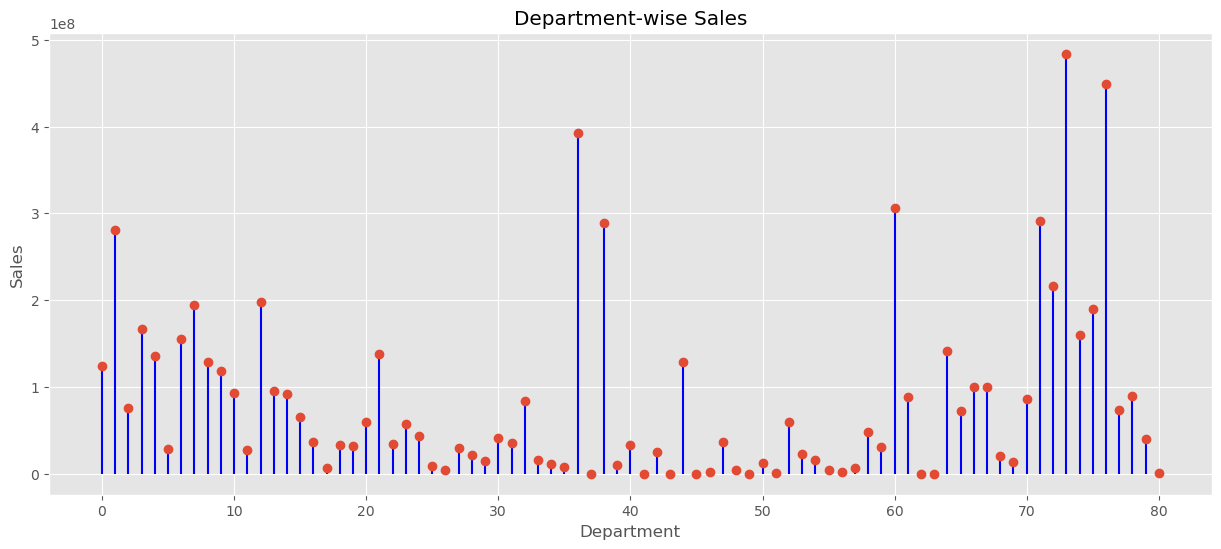

In [35]:
fig1, ax1 = plt.subplots(figsize=(15, 6))
plt.vlines(x=sales_by_dept.index, ymin=0, ymax=sales_by_dept['Weekly_Sales'], color='blue')
plt.plot(sales_by_dept.index,sales_by_dept['Weekly_Sales'], "o")
plt.title("Department-wise Sales")
plt.ylabel("Sales")
plt.xlabel("Department")

Department nos 73 and 76 are having higher weekly sales

In [36]:
denormSales = denormSales.assign(year = denormSales.Date.dt.year)
denormSales = denormSales.assign(week = denormSales.Date.dt.week)
denormSales = denormSales.assign(yearweek = denormSales.year * 100 + denormSales.week)
denormSales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,IsReturn,IsHolidayInt,year,week,yearweek
0,1,1,2010-05-02,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,False,0,2010,17,201017
1,1,1,2010-12-02,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,False,1,2010,48,201048
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,False,0,2010,7,201007
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,False,0,2010,8,201008
4,1,1,2010-05-03,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,False,0,2010,18,201018


ExtraTreeRegressor Score: 0.8928177392960023
Mean squared error: 52445844.19


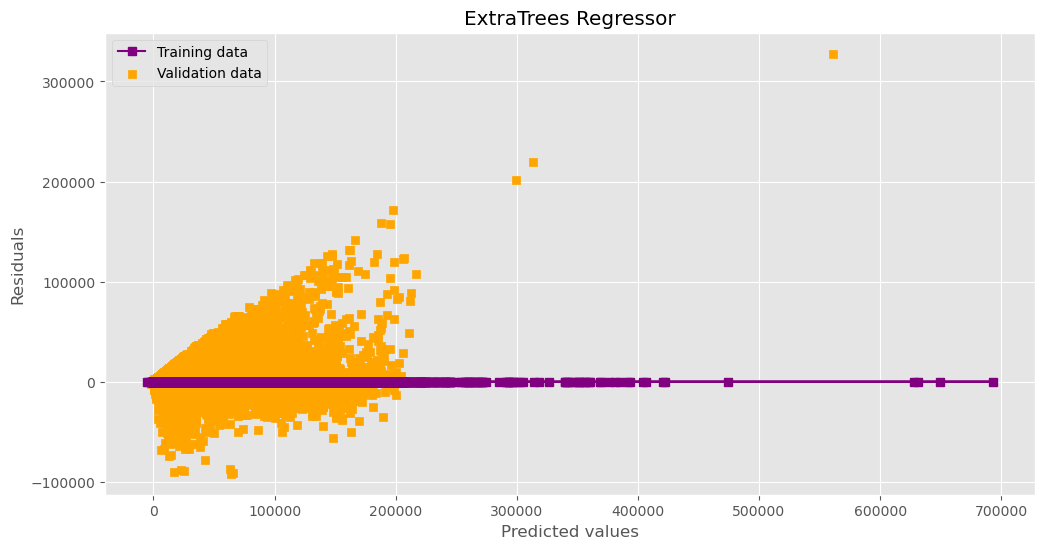

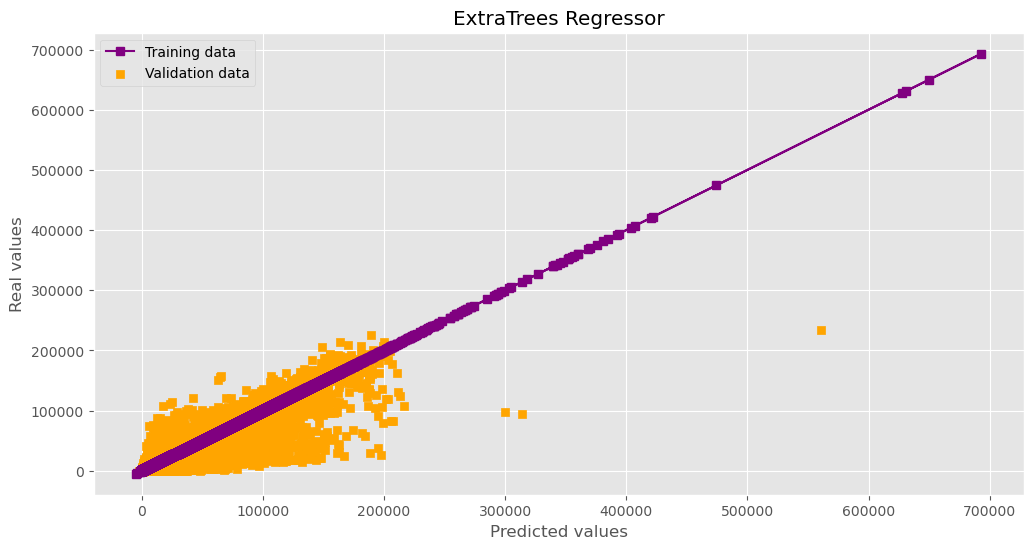

In [37]:
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor
train2 = denormSales.loc[denormSales['year'] != 2012]
test2 = denormSales.loc[denormSales['year'] == 2012]

featureset2 = ['Store', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHolidayInt', 'Size']

x_train2 = train2[featureset2]
y_train2 = train2['Weekly_Sales']

x_test2 = test2[featureset2]
y_test2 = test2['Weekly_Sales']

etr = ExtraTreesRegressor(n_estimators=200)
etr.fit(x_train2, y_train2)
y_pred2 = etr.predict(x_test2)

y_train_pred2 = etr.predict(x_train2)

print("ExtraTreeRegressor Score:", etr.score(x_test2, y_test2))
print("Mean squared error: %.2f" %
       np.mean((y_test2 - y_pred2) ** 2))

plt.figure(figsize=(12,6))
plt.plot(y_train_pred2, y_train_pred2 - y_train2, c = "purple", marker = "s", label = "Training data")
plt.scatter(y_pred2, y_pred2 - y_test2, c = "orange", marker = "s", label = "Validation data")
plt.title("ExtraTrees Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.show()

plt.figure(figsize=(12,6))
plt.plot(y_train_pred2, y_train2, c = "purple", marker = "s", label = "Training data")
plt.scatter(y_pred2, y_test2, c = "orange", marker = "s", label = "Validation data")
plt.title("ExtraTrees Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()

# Modelling the effects of markdowns on holiday weeks

In [38]:
df_table.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Weekly_Sales', 'Type'],
      dtype='object')

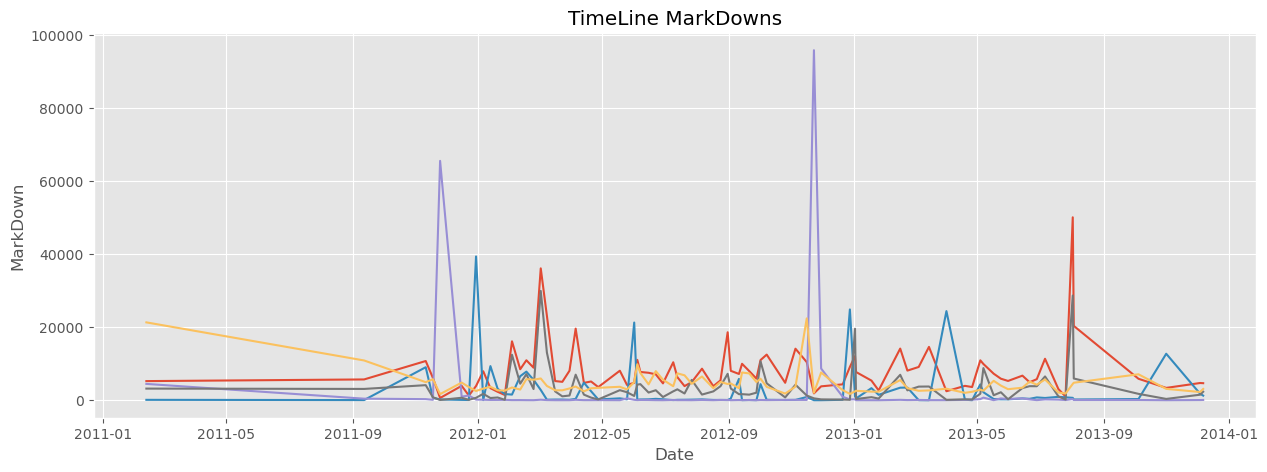

In [39]:
plt.figure(figsize=(15,5))
dt_markdown = df_table[df_table.MarkDown2.notnull()]
dt_markdown = dt_markdown.groupby('Date').agg({'MarkDown1': 'mean', 'MarkDown2': 'mean',
                                               'MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})
plt.plot(dt_markdown.index,dt_markdown.MarkDown1)
plt.plot(dt_markdown.index, dt_markdown.MarkDown2)
plt.plot(dt_markdown.index, dt_markdown.MarkDown3)
plt.plot(dt_markdown.index, dt_markdown.MarkDown4)
plt.plot(dt_markdown.index, dt_markdown.MarkDown5)
plt.title('TimeLine MarkDowns')
plt.ylabel('MarkDown')
plt.xlabel('Date')
plt.show()

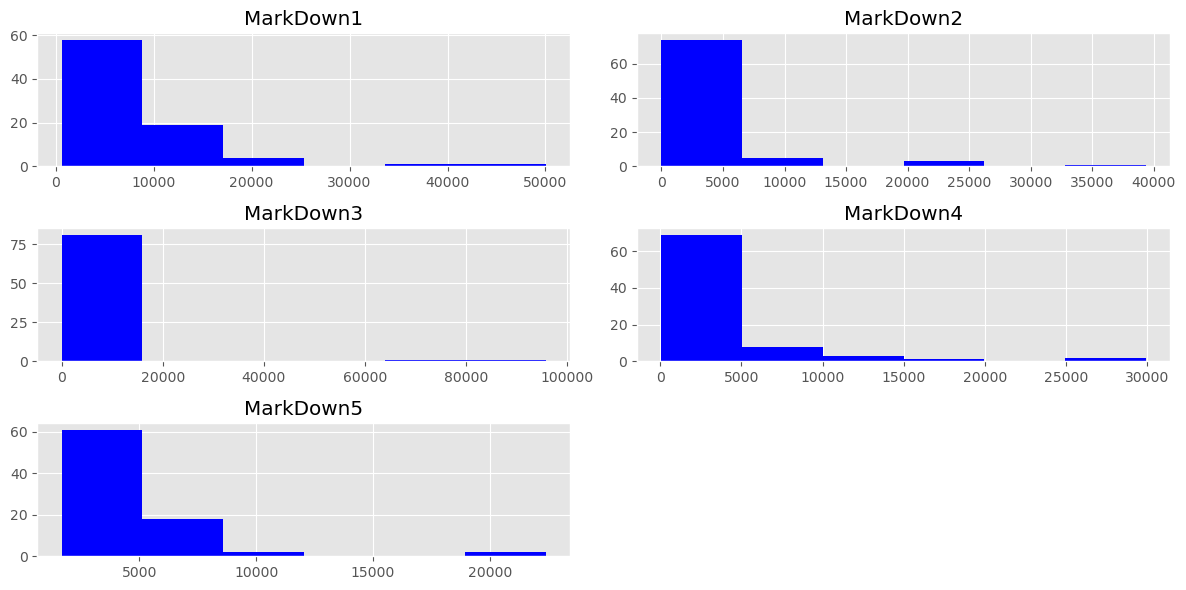

In [40]:
dt_markdown.hist(figsize=(12,6), bins=6, color='b')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'MarkDown')

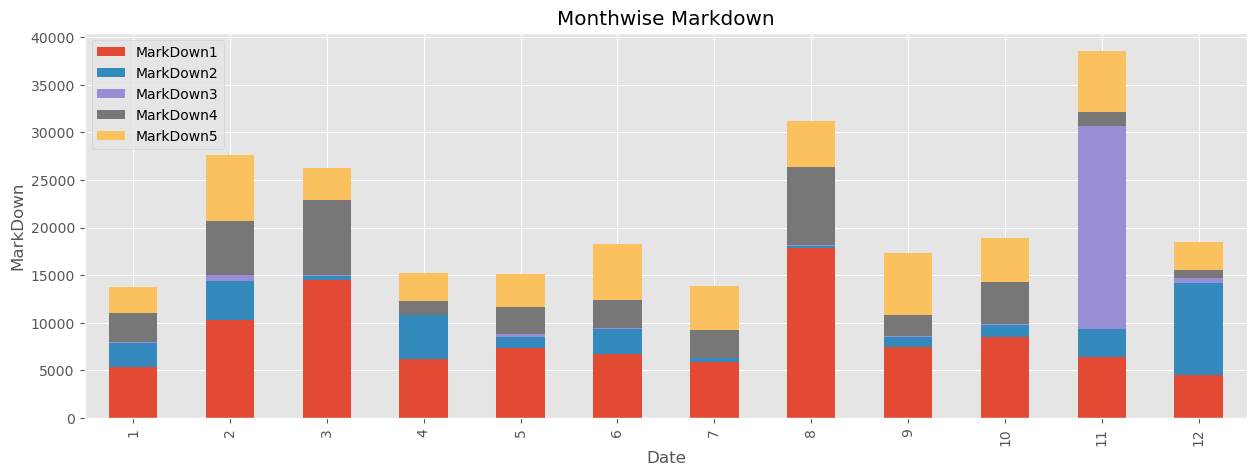

In [41]:
dt_markdown_month = dt_markdown.groupby(dt_markdown.index.month).agg({'MarkDown1': 'mean','MarkDown2': 'mean',
                                                                      'MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})
dt_markdown_month.plot(kind='bar', stacked=True, figsize=(15,5))
plt.title('Monthwise Markdown')
plt.ylabel('MarkDown')

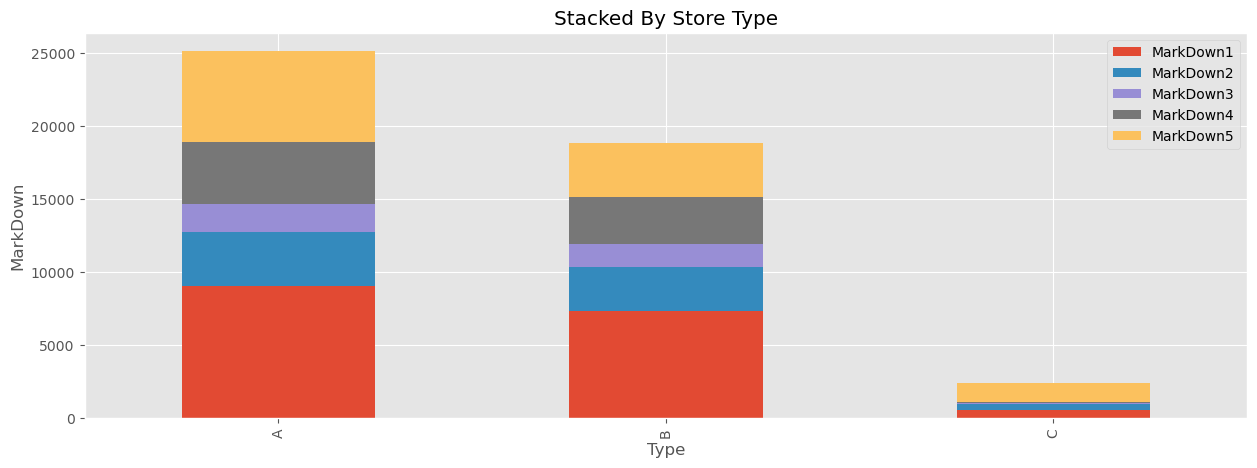

In [42]:
dt_markdown1 = df_tables[df_tables.MarkDown2.notnull()]
dt_markdown_type = dt_markdown1.groupby('Type').agg({'MarkDown1':'mean', 'MarkDown2':'mean', 'MarkDown3':'mean',
                                                    'MarkDown4':'mean', 'MarkDown5':'mean'})
dt_markdown_type.plot(kind='bar', stacked=True, figsize=(15,5))
plt.title('Stacked By Store Type')
plt.ylabel('MarkDown')
plt.show()

In [43]:
df=pd.merge(df_sales,df_features, on=['Store','Date', 'IsHoliday'], how='left')
df=pd.merge(df,df_store, on=['Store'], how='left')

df=df.fillna(0)
df['Temperature'] = (df['Temperature']- 32) * 5./9.

types_encoded, types =df['Type'].factorize()
df['Type'] = types_encoded

df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,1,2010-12-02,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2,1,1,2010-02-19,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
3,1,1,2010-02-26,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
4,1,1,2010-05-03,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


In [44]:
df_top_stores = df.groupby(by=['Store'], as_index=False)['Weekly_Sales'].sum()
df_top_stores.sort_values('Weekly_Sales', ascending=False)[:3]

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08


In [45]:
df20=df.where( df['Store'] == 20)
df20=df20.dropna()
df20=df20.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df20 = df20.set_index('Date')
df20.head()

,Weekly_Sales
Date,
2010-01-10,1933719.21
2010-02-04,2405395.22
2010-02-07,2143676.77
2010-02-19,2161549.76
2010-02-26,1898193.95


In [46]:
dfext=df.where( df['Store'] == 20)
dfext=dfext.dropna()
dfext=dfext.groupby(by=['Date'], as_index=False)[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
                                                  'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean()
dfext = dfext.set_index('Date')
dfext.head()

,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
Date,,,,,,,,,
2010-01-10,16.155556,2.707,204.885097,7.484,0.0,0.0,0.0,0.0,0.0
2010-02-04,10.555556,2.850,204.025284,7.856,0.0,0.0,0.0,0.0,0.0
2010-02-07,21.166667,2.815,204.465056,7.527,0.0,0.0,0.0,0.0,0.0
2010-02-19,-3.650000,2.745,204.432100,8.187,0.0,0.0,0.0,0.0,0.0
2010-02-26,0.177778,2.754,204.463087,8.187,0.0,0.0,0.0,0.0,0.0


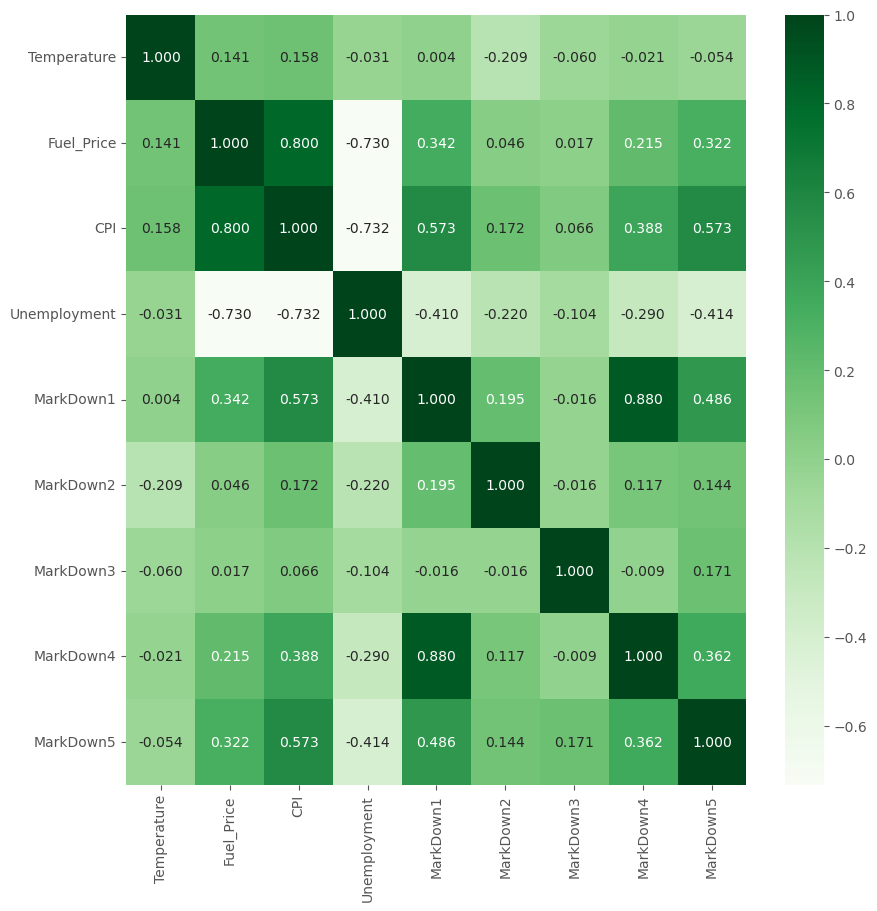

In [47]:
corr = dfext.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            annot=True, cmap="Greens", fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

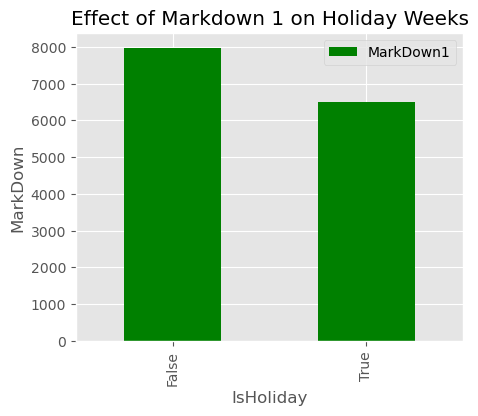

In [48]:
dt_markdown1 = df_tables[df_tables.MarkDown2.notnull()]
dt_markdown_type = dt_markdown1.groupby('IsHoliday').agg({'MarkDown1':'mean'})
dt_markdown_type.plot(kind='bar', color = 'green', stacked=True, figsize=(5,4))
plt.title('Effect of Markdown 1 on Holiday Weeks')
plt.ylabel('MarkDown')
plt.show()

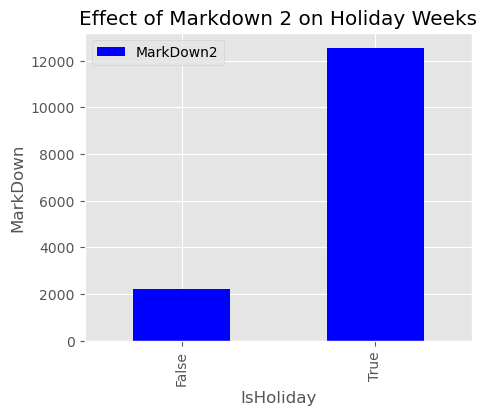

In [49]:
dt_markdown1 = df_tables[df_tables.MarkDown2.notnull()]
dt_markdown_type = dt_markdown1.groupby('IsHoliday').agg({'MarkDown2':'mean'})
dt_markdown_type.plot(kind='bar', color = 'blue',stacked=True, figsize=(5,4))
plt.title('Effect of Markdown 2 on Holiday Weeks')
plt.ylabel('MarkDown')
plt.show()

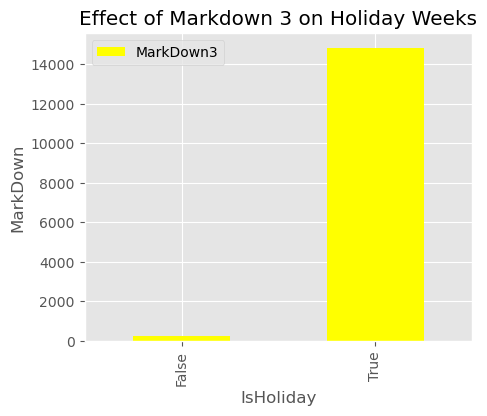

In [50]:
dt_markdown1 = df_tables[df_tables.MarkDown2.notnull()]
dt_markdown_type = dt_markdown1.groupby('IsHoliday').agg({'MarkDown3':'mean'})
dt_markdown_type.plot(kind='bar', color = 'yellow', stacked=True, figsize=(5,4))
plt.title('Effect of Markdown 3 on Holiday Weeks')
plt.ylabel('MarkDown')
plt.show()

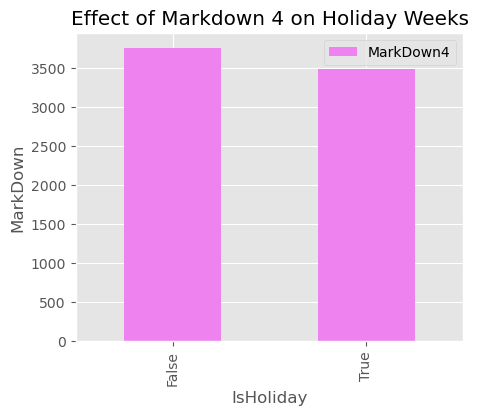

In [51]:
dt_markdown1 = df_tables[df_tables.MarkDown2.notnull()]
dt_markdown_type = dt_markdown1.groupby('IsHoliday').agg({'MarkDown4':'mean'})
dt_markdown_type.plot(kind='bar', color = 'violet', stacked=True, figsize=(5,4))
plt.title('Effect of Markdown 4 on Holiday Weeks')
plt.ylabel('MarkDown')
plt.show()

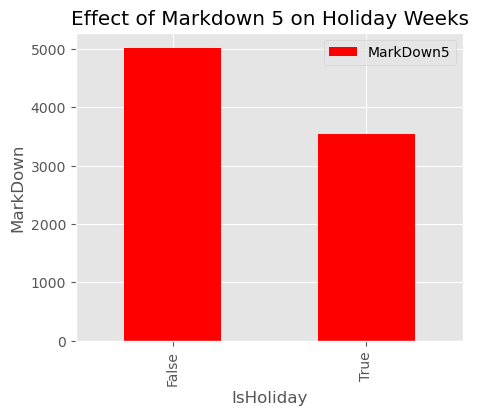

In [52]:
dt_markdown1 = df_tables[df_tables.MarkDown2.notnull()]
dt_markdown_type = dt_markdown1.groupby('IsHoliday').agg({'MarkDown5':'mean'})
dt_markdown_type.plot(kind='bar', color = 'red', stacked=True, figsize=(5,4))
plt.title('Effect of Markdown 5 on Holiday Weeks')
plt.ylabel('MarkDown')
plt.show()

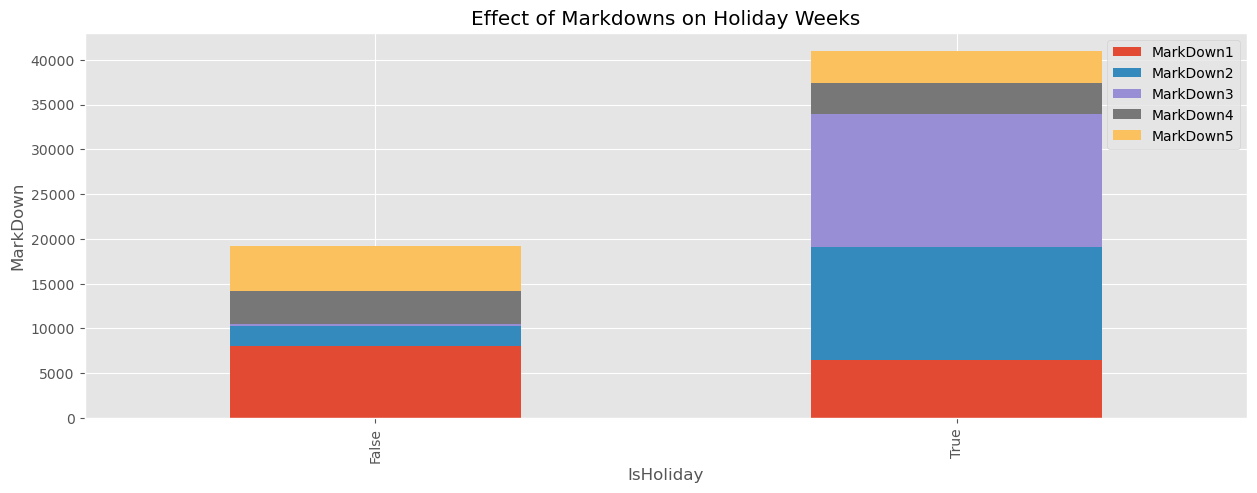

In [53]:
dt_markdown1 = df_tables[df_tables.MarkDown2.notnull()]
dt_markdown_type = dt_markdown1.groupby('IsHoliday').agg({'MarkDown1':'mean', 'MarkDown2':'mean', 'MarkDown3':'mean',
                                                    'MarkDown4':'mean', 'MarkDown5':'mean'})
dt_markdown_type.plot(kind='bar', stacked=True, figsize=(15,5))
plt.title('Effect of Markdowns on Holiday Weeks')
plt.ylabel('MarkDown')
plt.show()

# Conclusion
Markdown 1 is high in Non-Holiday weeks and moderate is Holiday weeks

Markdown 2 is high in Holiday weeks and low in Non-Holiday weeks

Markdown 3 is high in Holiday weeks and too low in Non-Holiday weeks

Markdown 4 is high in Non-Holiday weeks and moderate in Holiday weeks

Markdown 5 is high in Non-Holiday weeks and moderate in Holiday weeks

We can see that in holiday weeks markdown effect on sales is quite noticeable, whereas in the regular weeks the effect is more homogeneous.


Department nos 73 and 76 are having higher weekly sales

No direct correlation between Markdown and Sales

Some data patterns are missing in 2012 year

Lower sales in 2012 may be due to the missing or incorrent markdown data in that year